In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Uber Request Data.csv')

In [3]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'])

In [5]:
df['Req_Year'] = df['Request timestamp'].dt.year
df['Req_Month'] = df['Request timestamp'].dt.month
df['Req_Day'] = df['Request timestamp'].dt.day
df['Req_Hour'] = df['Request timestamp'].dt.hour
df['Req_Minute'] = df['Request timestamp'].dt.minute
df['Req_Second'] = df['Request timestamp'].dt.second

In [6]:
df['Drop_Year'] = df['Drop timestamp'].dt.year
df['Drop_Month'] = df['Drop timestamp'].dt.month
df['Drop_Day'] = df['Drop timestamp'].dt.day
df['Drop_Hour'] = df['Drop timestamp'].dt.hour
df['Drop_Minute'] = df['Drop timestamp'].dt.minute
df['Drop_Second'] = df['Drop timestamp'].dt.second

In [7]:
incomplete_trip = df.loc[(df['Status'] == 'Cancelled') | (df['Status'] == 'No Cars Available')]
complete_trip = df.loc[df['Status'] == 'Trip Completed']

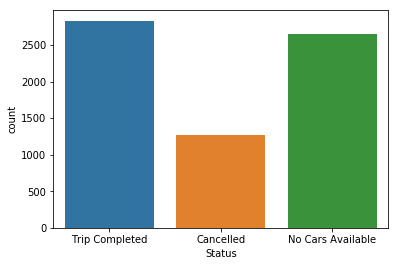

In [18]:
sns.countplot(df['Status'])
plt.show()

###### Number of times trips were complete = 2831<br>Number of times trips were incomplete = 3914 <br>Total Number of trips = 6745

**We can infer from the figures above that around 58% of the requests made, uber rides have not taken place either due to non-availability of cars or the cancellation of trips by the drivers with non-availability being the dominant factor. Cumulatively that is a huge loss of revenue to incur.**

In [19]:
pick_status = df.groupby(['Pickup point', 'Status'])

In [21]:
pd.DataFrame(pick_status['Status'].count())

Status
Pickup point Status                   
Airport      Cancelled             198
             No Cars Available    1713
             Trip Completed       1327
City         Cancelled            1066
             No Cars Available     937
             Trip Completed       1504

### Few Observations....
1. **Airport as Pickup Point**: We can clearly observe that the non-availability of cars with Airport as the pick-up point is a significant number. Perhaps the reason could be that most drivers tend to stay in the City as the availibility of customers, possibly, is more in City as compared to Airports. There is a postive insight also that if a driver commits to entertain a customer, then it is less likely that the trip will be cancelled.

2. **City as Pickup Point**: Although non-availability of cars in the City is a big number, however, non-availabilty is not as significant as compared to the Airport. One feature to notice is the number of Cancellations are much greater with City as the pick-up location as compared to Airports as pick-up points. Perhaps there is a possibility that the drivers tend to not take the many trips to Airport so that they can stick to the city because of more number of opportunities available in the City itself.

### My Recommendations....
##### In terms of cancellation, it is the City-to-Airport ride that seems problematic.<br>
- This issue can be resolved by providing better fares to the drivers for these kinds of rides.

##### In terms of non-availability, it is the Airport-to-City ride that displays challenges.<br>
- Non-availability can be due to two reasons. One can be that there is a genuine dearth of Cars available in the region and the second can be again that drivers tend to stick to the City because of more oppurtunities. First issue can be solved by alloting more number of cars while the Second issue can be resolved by providing better fares to the drivers. 

D:\conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


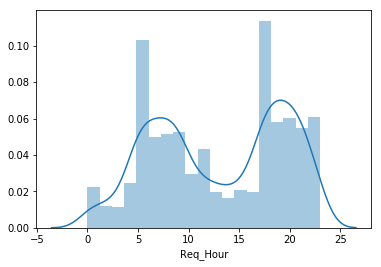

In [22]:
sns.distplot(df['Req_Hour'])
plt.show()

*Taking the entire data into consideration, it can be established that most of the ride requests are made in early mornings and late evenings.*

In [23]:
pickup_airport = df[df['Pickup point'] == 'Airport']
pickup_city = df[df['Pickup point'] == 'City']

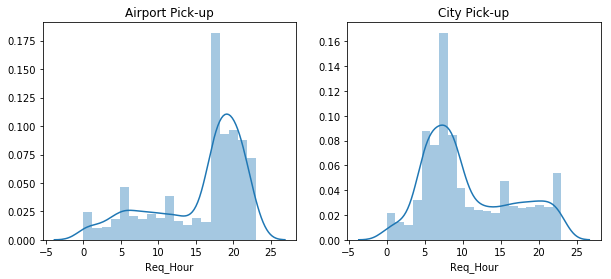

In [24]:
plt.figure(figsize = (10, 4))
plt.subplot(121)
sns.distplot(pickup_airport['Req_Hour'])
plt.title('Airport Pick-up')
plt.subplot(122)
sns.distplot(pickup_city['Req_Hour'])
plt.title('City Pick-up')
plt.show()

*It is apparent that if Airport is the pick-up location, then the peak of ride requests are made in the later part of the day and night and if the pick-up location is City, then this peak is achieved in the morning hours. The possibility of unavailibility of cars can come in these peak hours.*

### My Recommendation for peak hours would be to specifically target these peak hours to make the cars available.